In [14]:
from google.colab import files
x =files.upload()
x

Saving bike_buyers.csv to bike_buyers.csv


{'bike_buyers.csv': b'\xef\xbb\xbfID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike\r\n12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No\r\n24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No\r\n14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No\r\n24381,Single,,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes\r\n25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes\r\n13507,Married,Female,10000,2,Partial College,Manual,Yes,0,1-2 Miles,Europe,50,No\r\n27974,Single,Male,160000,2,High School,Management,,4,0-1 Miles,Pacific,33,Yes\r\n19364,Married,Male,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,43,Yes\r\n22155,,Male,20000,2,Partial High School,Clerical,Yes,2,5-10 Miles,Pacific,58,No\r\n19280,Married,Male,,2,Partial College,Manual,Yes,1,0-1 Miles,Europe,,Yes\r\n22173,Married,Femal

In [15]:
import pandas as pd

df = pd.read_csv('bike_buyers.csv')
df
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [ ]:
# we interpolate if the two cloumns are correlated. 
df.corr()

,ID,Income,Children,Cars,Age
ID,1.000000,-0.075081,-0.028747,0.022125,-0.054238
Income,-0.075081,1.000000,0.261053,0.439980,0.170845
Children,-0.028747,0.261053,1.000000,0.280243,0.531668
Cars,0.022125,0.439980,0.280243,1.000000,0.186398
Age,-0.054238,0.170845,0.531668,0.186398,1.000000


In [ ]:
df.groupby(['Marital Status']).count()

,ID,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
Marital Status,,,,,,,,,,,,
Married,535,529,532,534,535,535,534,532,535,535,531,535
Single,458,453,456,451,458,458,455,452,458,458,455,458


In [ ]:
df.groupby(['Gender']).count()

,ID,Marital Status,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
Gender,,,,,,,,,,,,
Female,489,487,487,484,489,489,486,485,489,489,488,489
Male,500,495,496,498,500,500,499,495,500,500,494,500


In [ ]:
df.groupby(['Education']).count()

,ID,Marital Status,Gender,Income,Children,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
Education,,,,,,,,,,,,
Bachelors,306,302,301,304,304,306,304,305,306,306,305,306
Graduate Degree,174,173,172,174,173,174,173,171,174,174,170,174
High School,179,179,179,178,177,179,178,178,179,179,178,179
Partial College,265,264,261,262,264,265,265,262,265,265,263,265
Partial High School,76,75,76,76,74,76,76,75,76,76,76,76


In [ ]:
df.groupby(['Occupation']).count()

,ID,Marital Status,Gender,Income,Children,Education,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
Occupation,,,,,,,,,,,,
Clerical,177,173,177,176,177,177,176,174,177,177,176,177
Management,173,173,171,173,171,173,172,172,173,173,172,173
Manual,119,119,119,116,117,119,119,118,119,119,117,119
Professional,276,274,271,275,274,276,276,275,276,276,274,276
Skilled Manual,255,254,251,254,253,255,253,252,255,255,253,255


In [16]:
df.groupby(['Home Owner']).count()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Cars,Commute Distance,Region,Age,Purchased Bike
Home Owner,,,,,,,,,,,,
No,314,311,309,312,311,314,314,312,314,314,312,314
Yes,682,678,676,678,677,682,682,675,682,682,676,682


In [ ]:
df.groupby(['Region']).count()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Age,Purchased Bike
Region,,,,,,,,,,,,
Europe,300,298,300,297,298,300,300,299,295,300,297,300
North America,508,508,500,507,503,508,508,506,504,508,504,508
Pacific,192,187,189,190,191,192,192,191,192,192,191,192


In [18]:
df.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,994.000000,992.000000,991.000000,992.000000
mean,19965.992000,56267.605634,1.910282,1.455096,44.181452
std,5347.333948,31067.817462,1.626910,1.121755,11.362007
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


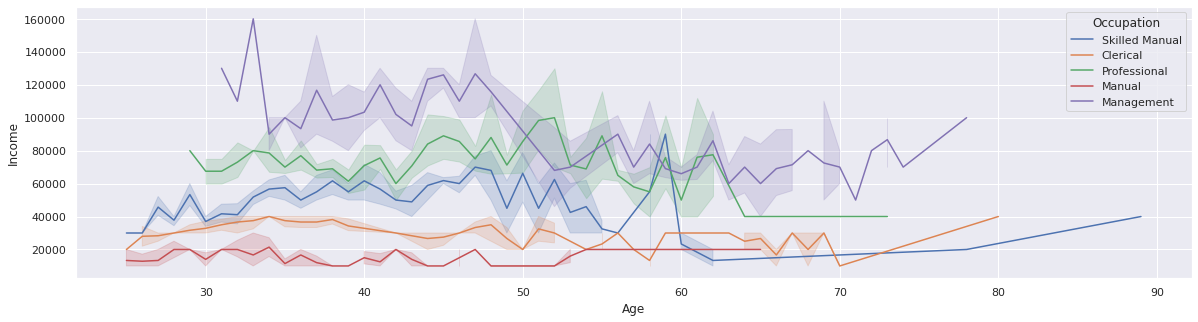

In [17]:
import seaborn as sns
sns.lineplot(data = df, x ='Age', y = 'Income', hue = 'Occupation')

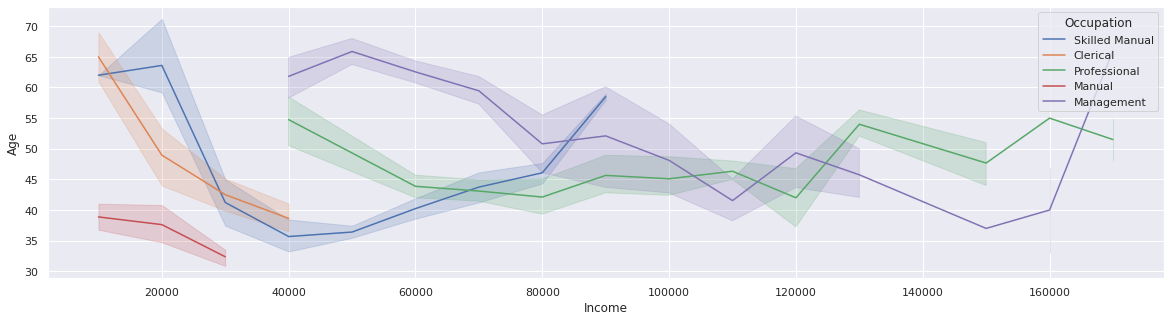

In [19]:
sns.lineplot(data = df, x ='Income', y = 'Age', hue = 'Occupation')

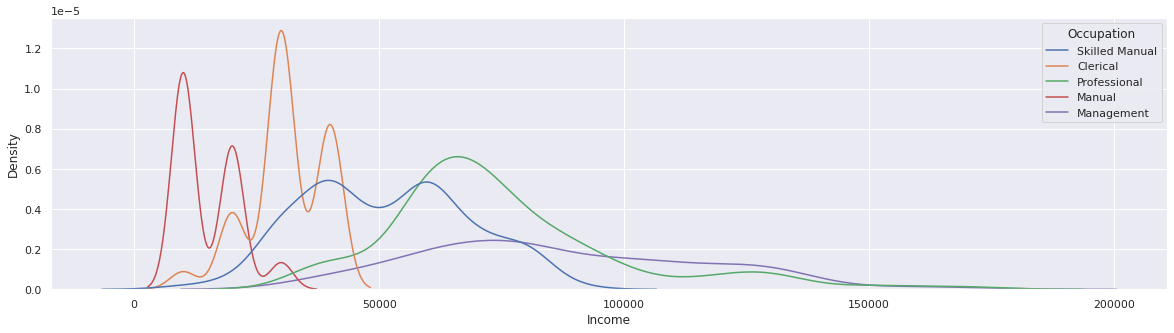

In [20]:
sns.kdeplot(data = df, x = 'Income', hue = "Occupation")

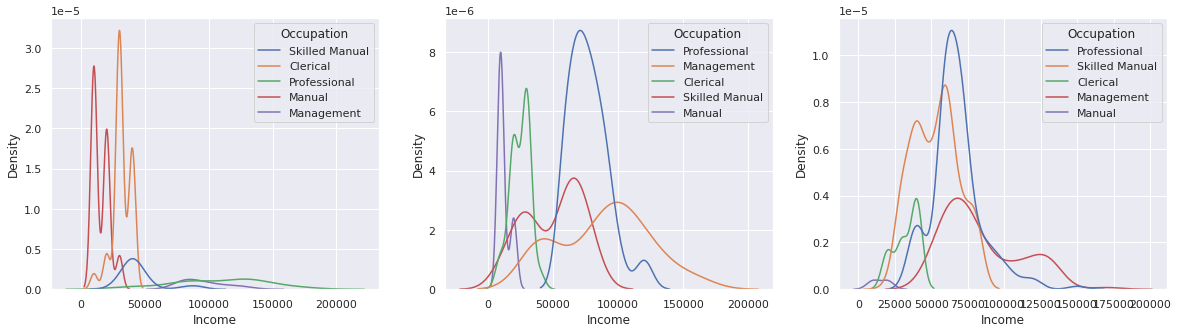

In [27]:
# By using subplotlib we can make several plots parallelly
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(20,5)})
fig,axes = plt.subplots(1,3)
sns.kdeplot(data = df[df['Region'] == 'Europe'], x = 'Income', hue = 'Occupation', ax = axes[0])
sns.kdeplot(data = df[df['Region'] == 'Pacific'], x = 'Income', hue = 'Occupation', ax = axes[1])
sns.kdeplot(data = df[df['Region'] == 'North America'], x = 'Income', hue = 'Occupation', ax = axes[2])


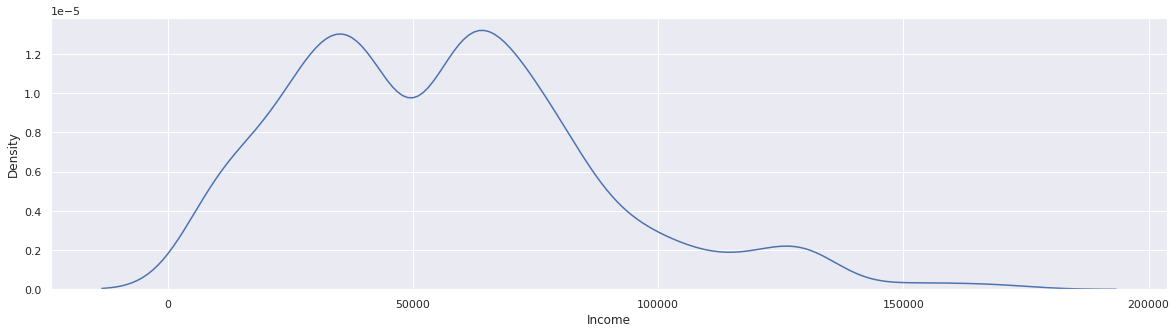

In [28]:

sns.kdeplot(data = df, x = 'Income')

In [30]:
df[(pd.isnull(df['Income']))]

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
9,19280,Married,Male,NaN,2.0,Partial College,Manual,Yes,1.0,0-1 Miles,Europe,NaN,Yes
110,21006,Single,Female,NaN,1.0,Partial College,Manual,No,0.0,0-1 Miles,Europe,46.0,Yes
191,26944,Single,Male,NaN,2.0,High School,Manual,Yes,0.0,0-1 Miles,Europe,36.0,Yes
301,17926,NaN,Female,NaN,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Pacific,28.0,Yes
441,11061,Married,Male,NaN,2.0,Partial College,Skilled Manual,Yes,2.0,5-10 Miles,Pacific,52.0,Yes
509,24357,Married,Male,NaN,3.0,Bachelors,Professional,Yes,1.0,2-5 Miles,North America,48.0,Yes


In [40]:
df[(pd.isnull(df['Income'])) & (df['Region'] == 'North America')]

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
509,24357,Married,Male,NaN,3.0,Bachelors,Professional,Yes,1.0,2-5 Miles,North America,48.0,Yes


In [45]:
NA_professional_income_median = df[(df['Region'] == 'North America') & (df['Occupation'] == 'Professional')]['Income'].median()
NA_professional_income_median

70000.0

In [49]:
df.iloc[509, df.columns.get_loc('Income')] = NA_professional_income_median

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            995 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [52]:
df[(pd.isnull(df['Income'])) & (df['Region'] == 'Europe')]

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
9,19280,Married,Male,NaN,2.0,Partial College,Manual,Yes,1.0,0-1 Miles,Europe,NaN,Yes
110,21006,Single,Female,NaN,1.0,Partial College,Manual,No,0.0,0-1 Miles,Europe,46.0,Yes
191,26944,Single,Male,NaN,2.0,High School,Manual,Yes,0.0,0-1 Miles,Europe,36.0,Yes


In [53]:
indexlist  = df[(pd.isnull(df['Income'])) & (df['Region'] == 'Europe')].index
indexlist

Int64Index([9, 110, 191], dtype='int64')

In [57]:
EU_manual_income_median = df[(df['Region'] == 'Europe') & (df['Occupation'] == 'Manual')]['Income'].median()
EU_manual_income_median 

for item in indexlist:
  df.iloc[item, df.columns.get_loc('Income')] = NA_professional_income_median



In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            998 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [60]:
df[(pd.isnull(df['Income'])) & (df['Region'] == 'Pacific')]


,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
301,17926,NaN,Female,NaN,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Pacific,28.0,Yes
441,11061,Married,Male,NaN,2.0,Partial College,Skilled Manual,Yes,2.0,5-10 Miles,Pacific,52.0,Yes


In [66]:
PF_clerical_income_median = df[(df['Region'] == 'Pacific') & (df['Occupation'] == 'Clerical')]['Income'].median()
PF_skilled_income_median = df[(df['Region'] == 'Pacific') & (df['Occupation'] == 'Skilled Manual')]['Income'].median()

df.iloc[301, df.columns.get_loc('Income')] = PF_clerical_income_median
df.iloc[441, df.columns.get_loc('Income')] = PF_skilled_income_median

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            1000 non-null   float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


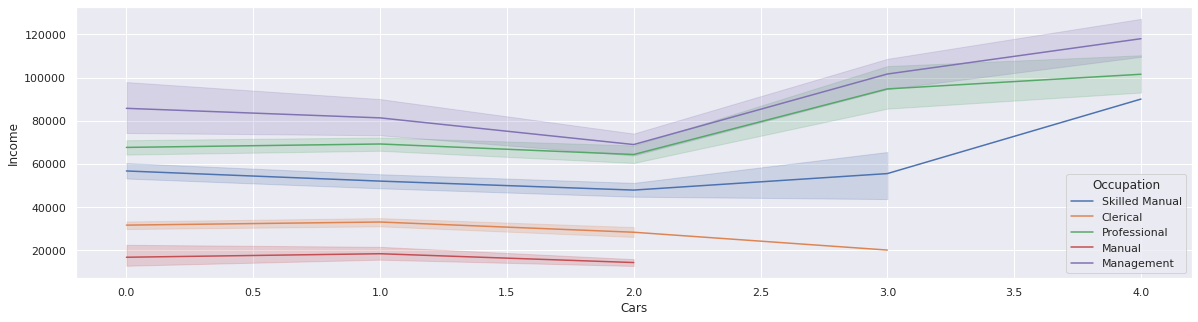

In [69]:
sns.lineplot(data = df, x = 'Cars', y ='Income', hue = 'Occupation')

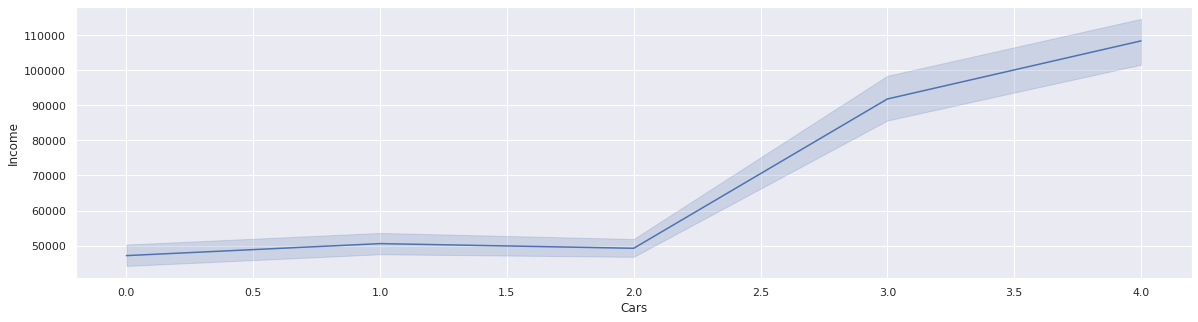

In [70]:
sns.lineplot(data = df, x = 'Cars', y ='Income')

In [72]:
df['Cars'].interpolate(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            1000 non-null   float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              1000 non-null   float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


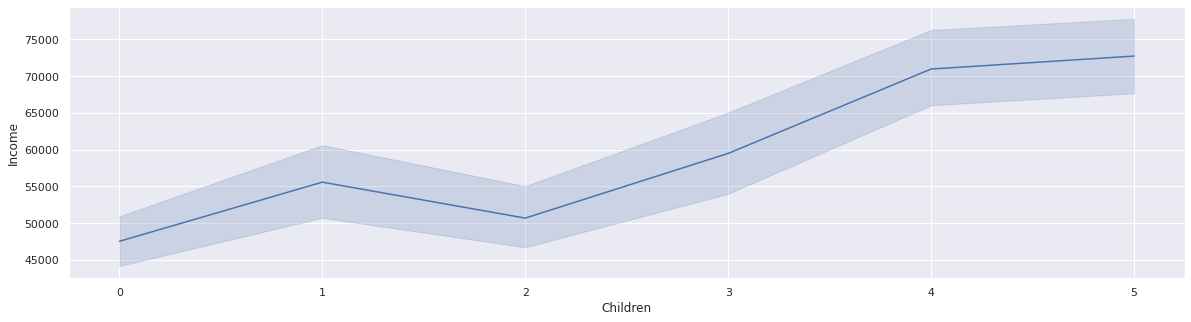

In [73]:
sns.lineplot(data = df, x = 'Children', y ='Income')

In [74]:
df['Children'].interpolate(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            1000 non-null   float64
 4   Children          1000 non-null   float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              1000 non-null   float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


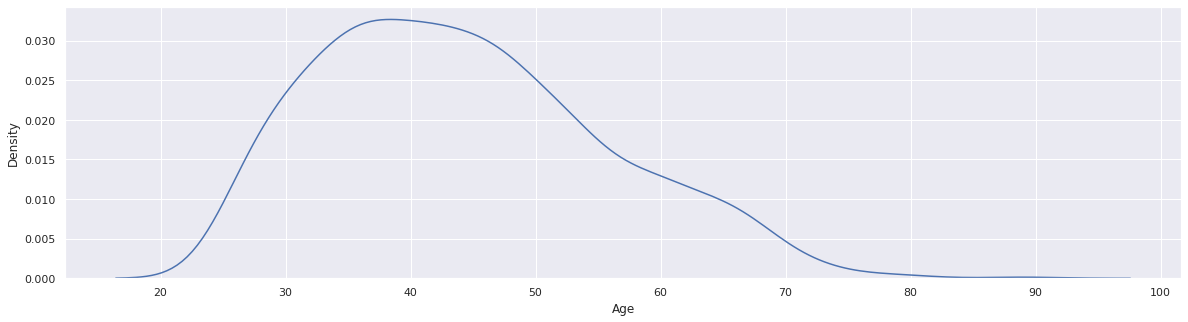

In [75]:
sns.kdeplot(data = df, x ='Age' )

In [76]:
df['Age'].median()

43.0

In [79]:
df['Age'].fillna(df['Age'].median(), inplace =True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            1000 non-null   float64
 4   Children          1000 non-null   float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              1000 non-null   float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               1000 non-null   float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [84]:
df['Marital Status'].fillna('Not Known', inplace = True)
df['Gender'].fillna('Not Known', inplace = True)
df['Home Owner'].fillna('Not Known', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    1000 non-null   object 
 2   Gender            1000 non-null   object 
 3   Income            1000 non-null   float64
 4   Children          1000 non-null   float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        1000 non-null   object 
 8   Cars              1000 non-null   float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               1000 non-null   float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [85]:
df

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,Not Known,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000.0,2.0,High School,Professional,Yes,2.0,2-5 Miles,North America,54.0,Yes
996,28672,Single,Male,70000.0,4.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,35.0,Yes
997,11809,Married,Not Known,60000.0,2.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,North America,38.0,Yes
998,19664,Single,Male,100000.0,3.0,Bachelors,Management,No,3.0,1-2 Miles,North America,38.0,No
